**1. Import**

In [11]:
!pip install ultralytics
!pip install datasets
import torch
from ultralytics import YOLO
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import datasets
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

**2. Train**

In [17]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Colab Notebooks/ECS174FP_Task1
import os
print("Current Working Directory:", os.getcwd())


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/ECS174FP_Task1
Current Working Directory: /content/drive/My Drive/Colab Notebooks/ECS174FP_Task1


In [18]:

#Load a model
# model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="./dataset.yaml", epochs=300)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./dataset.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 25.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/My Drive/Colab Notebooks/ECS174FP_Task1/data/train/labels... 157 images, 0 backgrounds, 0 corrupt: 100%|██████████| 157/157 [00:57<00:00,  2.75it/s]

train: New cache created: /content/drive/My Drive/Colab Notebooks/ECS174FP_Task1/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/My Drive/Colab Notebooks/ECS174FP_Task1/data/valid/labels... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:09<00:00,  1.41it/s]

val: New cache created: /content/drive/My Drive/Colab Notebooks/ECS174FP_Task1/data/valid/labels.cache


Plotting labels to runs/detect/train23/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train23
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      2.55G      1.733      4.218      1.364         26        640: 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]

                   all         14         16    0.00262      0.688      0.184      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      2.24G      1.476      2.733      1.142         27        640: 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         14         16    0.00333      0.875      0.353      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      2.26G      1.485      2.327      1.159         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         14         16    0.00245      0.338      0.159     0.0845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      2.24G      1.551      2.066      1.144         28        640: 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         14         16    0.00333      0.875     0.0792     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      2.26G      1.431       1.93      1.146         24        640: 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         14         16    0.00333      0.875      0.192       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      2.26G      1.432      1.811      1.157         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         14         16     0.0031      0.812      0.132      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      2.24G      1.322      1.682      1.113         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         14         16          1      0.311      0.487      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      2.25G      1.351      1.639      1.104         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         14         16      0.513      0.438      0.383      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      2.25G      1.401      1.649      1.161         30        640: 100%|██████████| 10/10 [00:03<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         14         16      0.498      0.438      0.431      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      2.24G      1.384      1.599      1.195         35        640: 100%|██████████| 10/10 [00:03<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         14         16     0.0505      0.312      0.098     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      2.25G      1.342      1.478       1.13         18        640: 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         14         16      0.453      0.625      0.351      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      2.24G      1.356        1.5       1.16         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         14         16     0.0796      0.625     0.0939     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      2.25G      1.337      1.308      1.145         41        640: 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         14         16      0.333     0.0625      0.123     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      2.24G      1.332      1.357      1.149         24        640: 100%|██████████| 10/10 [00:03<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         14         16       0.05     0.0625     0.0241     0.0061



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      2.26G      1.302      1.386      1.119         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         14         16      0.121      0.188      0.112     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      2.24G      1.333      1.238       1.14         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         14         16        0.9      0.625      0.719      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      2.24G      1.348      1.267      1.147         29        640: 100%|██████████| 10/10 [00:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         14         16      0.705       0.75      0.743      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      2.25G      1.284      1.187      1.111         31        640: 100%|██████████| 10/10 [00:03<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         14         16      0.686      0.819      0.798      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      2.26G      1.328      1.152      1.104         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         14         16      0.721       0.75      0.772      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      2.25G      1.251       1.06      1.073         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


                   all         14         16      0.974      0.688      0.801      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      2.24G      1.313      1.041      1.093         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         14         16      0.491      0.688      0.553      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      2.24G      1.255      1.022      1.049         26        640: 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         14         16      0.839      0.625      0.793      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      2.25G      1.167      1.012      1.054         23        640: 100%|██████████| 10/10 [00:03<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         14         16      0.774      0.858      0.852      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      2.25G      1.204      1.019      1.105         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         14         16      0.874      0.865      0.901      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      2.26G      1.205     0.9501      1.061         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         14         16      0.923      0.875      0.906       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      2.25G      1.191     0.9375      1.084         21        640: 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         14         16      0.847      0.812      0.852      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      2.25G      1.162     0.9348      1.064         16        640: 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         14         16      0.819      0.875       0.88      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      2.24G      1.164     0.8368      1.053         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         14         16      0.815      0.875      0.857      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      2.26G      1.162     0.8942      1.096         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         14         16      0.911      0.875      0.896      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      2.28G      1.176     0.8567      1.031         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         14         16      0.881      0.925      0.914      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      2.25G      1.198     0.8868      1.067         29        640: 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         14         16      0.878      0.902      0.942      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      2.25G      1.114     0.8552      1.065         28        640: 100%|██████████| 10/10 [00:03<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         14         16      0.906      0.812      0.869      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      2.25G      1.113     0.8494      1.036         29        640: 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         14         16      0.869      0.875      0.933       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      2.27G       1.09     0.7864      1.007         24        640: 100%|██████████| 10/10 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         14         16      0.984      0.688      0.835      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      2.26G      1.133     0.8305      1.034         29        640: 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         14         16       0.91      0.812      0.817      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      2.24G      1.095      0.812      1.044         15        640: 100%|██████████| 10/10 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         14         16      0.857      0.812      0.817      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      2.25G      1.086     0.7887      1.027         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         14         16      0.812      0.811      0.876      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      2.25G      1.074     0.7776       1.01         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         14         16          1      0.802      0.906      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      2.24G      1.055     0.7634      1.007         39        640: 100%|██████████| 10/10 [00:03<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         14         16       0.77      0.875      0.869      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      2.26G      1.034     0.7759      1.003         29        640: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         14         16      0.787      0.922      0.884      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      2.25G      1.051     0.7597      1.007         39        640: 100%|██████████| 10/10 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         14         16      0.785      0.875      0.906      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      2.24G     0.9943     0.7182      1.006         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         14         16      0.877      0.938      0.934      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      2.28G     0.9787     0.7008     0.9628         23        640: 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         14         16      0.796      0.976       0.93      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      2.24G     0.9562     0.6423     0.9672         31        640: 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         14         16      0.919      0.812      0.877      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      2.24G      1.073     0.7371      1.019         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         14         16      0.879       0.75      0.865      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      2.24G     0.9975     0.6718     0.9953         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         14         16      0.866      0.938      0.938      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      2.26G      1.066     0.7013      1.018         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         14         16      0.924      0.875      0.949      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      2.24G     0.9768     0.6676      1.007         27        640: 100%|██████████| 10/10 [00:03<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         14         16      0.937       0.93      0.971      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      2.25G     0.9745     0.6596     0.9782         27        640: 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]

                   all         14         16      0.933      0.868      0.911      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      2.25G     0.9772     0.6796     0.9789         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         14         16       0.91      0.812      0.837      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      2.24G     0.9467     0.6636     0.9793         16        640: 100%|██████████| 10/10 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         14         16      0.931      0.875      0.873      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      2.24G     0.9492     0.6257     0.9661         44        640: 100%|██████████| 10/10 [00:03<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         14         16      0.928      0.875      0.888      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      2.25G     0.9856     0.6365     0.9714         27        640: 100%|██████████| 10/10 [00:03<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         14         16      0.937      0.933      0.937      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      2.25G       1.02     0.6592      1.004         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         14         16      0.937      0.936      0.929       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      2.24G      1.044     0.6827     0.9903         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         14         16      0.986       0.75      0.907      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      2.25G     0.9975     0.6781      1.003         17        640: 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         14         16      0.937       0.93      0.976      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      2.24G     0.9363     0.6308     0.9693         35        640: 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         14         16      0.912      0.875      0.948      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      2.28G     0.9505     0.6291     0.9689         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         14         16      0.932      0.812      0.936      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      2.25G     0.9447     0.6541     0.9886         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         14         16       0.96      0.875      0.944      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      2.24G     0.9244     0.6043     0.9616         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         14         16      0.818      0.846      0.924       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      2.24G      0.878     0.6137     0.9743         24        640: 100%|██████████| 10/10 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all         14         16      0.891      0.875      0.962      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      2.25G     0.9609     0.6357     0.9696         36        640: 100%|██████████| 10/10 [00:03<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         14         16      0.925      0.812      0.918      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      2.24G      0.899      0.627     0.9428         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         14         16      0.932      0.858      0.893      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      2.26G     0.8769     0.6082     0.9396         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         14         16      0.829      0.938      0.936       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      2.25G     0.8759      0.584     0.9379         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         14         16      0.999      0.812      0.924      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      2.24G     0.8944     0.6025     0.9594         30        640: 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         14         16      0.917      0.875      0.924      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      2.24G     0.8657     0.5814     0.9216         29        640: 100%|██████████| 10/10 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         14         16      0.936      0.919      0.917      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      2.24G     0.8634      0.578     0.9502         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         14         16      0.945      0.875      0.965      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      2.25G     0.8073     0.5355     0.9201         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         14         16      0.921      0.875      0.959      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      2.25G     0.8912     0.5811     0.9451         38        640: 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         14         16          1      0.796      0.944      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      2.26G     0.8892     0.5699     0.9355         36        640: 100%|██████████| 10/10 [00:03<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         14         16      0.923      0.875      0.931      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      2.24G     0.8488     0.5552     0.9306         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         14         16      0.933      0.865      0.913      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      2.24G     0.8839     0.6065     0.9335         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         14         16      0.781      0.938      0.887      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      2.25G     0.8942     0.6134     0.9421         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         14         16      0.933      0.866      0.935      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      2.24G      0.915     0.6173     0.9519         42        640: 100%|██████████| 10/10 [00:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         14         16      0.871       0.75      0.898       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      2.25G     0.9067     0.6073     0.9613         46        640: 100%|██████████| 10/10 [00:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         14         16      0.873      0.938      0.911       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      2.25G     0.8556       0.57     0.9131         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         14         16      0.906      0.812      0.907      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      2.24G     0.8521     0.5671     0.9343         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         14         16      0.823      0.873      0.935      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      2.25G     0.8324     0.5711     0.9226         24        640: 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         14         16      0.814      0.875      0.938      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      2.24G     0.8415     0.5613     0.9582         26        640: 100%|██████████| 10/10 [00:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         14         16      0.939      0.971       0.98      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      2.25G     0.8486     0.5536     0.9266         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         14         16      0.934      0.938      0.965      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      2.27G      0.852     0.5748      0.941         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         14         16       0.92      0.875       0.92      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      2.24G     0.8518     0.5493     0.9454         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         14         16      0.819      0.938      0.882      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      2.24G     0.8114     0.5653     0.9151         17        640: 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         14         16          1      0.603      0.826      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      2.24G     0.8112     0.5528     0.9499         25        640: 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         14         16       0.73      0.845      0.864      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      2.25G       0.85     0.5485     0.9244         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         14         16      0.999      0.812      0.922      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      2.26G     0.7829     0.5314     0.9252         15        640: 100%|██████████| 10/10 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         14         16      0.931      0.875      0.927      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      2.25G     0.8402     0.5389     0.9316         26        640: 100%|██████████| 10/10 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         14         16          1      0.874      0.926      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      2.25G     0.7784      0.512     0.9368         27        640: 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         14         16      0.977      0.875      0.904      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      2.24G     0.8353     0.5269     0.9284         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         14         16      0.932      0.875      0.888      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      2.24G     0.8036       0.54     0.9292         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         14         16       0.93      0.875      0.878       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      2.24G     0.8527     0.5715     0.9314         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         14         16      0.874      0.875       0.86      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      2.24G     0.8024      0.546     0.9417         17        640: 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         14         16      0.933      0.869      0.897      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      2.24G     0.7864     0.5136     0.9251         30        640: 100%|██████████| 10/10 [00:03<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         14         16      0.935      0.938       0.93      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      2.25G     0.8119     0.5202     0.9328         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         14         16      0.928      0.938      0.954      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      2.25G      0.799     0.5491      0.918         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         14         16      0.937      0.933      0.967      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      2.25G     0.7452     0.4913     0.9039         39        640: 100%|██████████| 10/10 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         14         16      0.937      0.937      0.969       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      2.24G     0.7361     0.4869     0.9009         24        640: 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         14         16      0.882      0.932      0.974      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      2.25G     0.7473     0.4856     0.8947         20        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         14         16      0.882      0.933       0.97      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      2.28G      0.751     0.5182     0.9108         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         14         16      0.913      0.875      0.959        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      2.24G     0.7652     0.5028     0.9257         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         14         16      0.968      0.812      0.938      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      2.25G     0.8071     0.5348     0.9254         22        640: 100%|██████████| 10/10 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         14         16      0.927      0.875      0.916      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      2.25G     0.7658     0.5166     0.9165         30        640: 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         14         16      0.925      0.875      0.928      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      2.25G     0.7478     0.5024      0.898         30        640: 100%|██████████| 10/10 [00:03<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         14         16      0.937      0.936      0.968      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      2.24G     0.7976     0.5405     0.9307         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         14         16      0.935      0.938      0.944      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      2.24G     0.7815     0.4994      0.912         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         14         16      0.933      0.938      0.961      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      2.28G      0.761     0.5191     0.9152         37        640: 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         14         16      0.934      0.938      0.959      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      2.26G     0.7529     0.5104     0.9119         18        640: 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         14         16      0.933      0.938      0.968      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      2.25G     0.7518     0.5071      0.916         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         14         16      0.924      0.875      0.949      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      2.24G     0.7147     0.4674     0.8899         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         14         16          1      0.812      0.937      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      2.24G     0.7272     0.4841     0.8814         41        640: 100%|██████████| 10/10 [00:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         14         16      0.976      0.875      0.956      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      2.24G     0.7385     0.4751     0.8825         31        640: 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         14         16      0.881          1      0.985       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      2.24G     0.7402     0.4943     0.8934         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         14         16      0.931      0.938      0.982      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      2.24G     0.7243     0.4737     0.9029         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         14         16      0.936      0.938      0.964      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      2.25G     0.7392     0.4792     0.8901         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         14         16      0.929      0.938      0.964      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      2.26G     0.7457     0.4914     0.8897         20        640: 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         14         16      0.924          1       0.98       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      2.25G     0.7441     0.4828     0.8825         36        640: 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         14         16      0.937      0.936      0.962      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      2.25G     0.7296     0.4644     0.9013         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         14         16      0.937      0.929      0.971      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      2.27G     0.7053     0.4469     0.9046         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         14         16      0.933      0.874      0.941      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      2.24G     0.7109     0.4661     0.9052         26        640: 100%|██████████| 10/10 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         14         16      0.928      0.804      0.928      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      2.25G     0.7359     0.4651     0.8872         37        640: 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         14         16      0.825      0.938      0.943      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      2.25G     0.6707      0.455     0.8983         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         14         16      0.867      0.938      0.967        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      2.28G     0.7562     0.4786      0.895         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         14         16      0.839      0.976      0.963      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      2.24G     0.7608     0.4888     0.9059         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         14         16      0.924      0.875      0.956      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      2.26G     0.7101     0.4927     0.8981         22        640: 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         14         16      0.882      0.933      0.962      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      2.24G     0.7181     0.4685     0.8871         31        640: 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         14         16      0.923      0.875       0.96      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      2.24G     0.6587     0.4482     0.8938         13        640: 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         14         16      0.939      0.812      0.924      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      2.25G     0.7184     0.4784      0.891         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         14         16          1      0.935      0.966      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      2.25G     0.6954     0.4777     0.8875         30        640: 100%|██████████| 10/10 [00:03<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         14         16      0.887      0.985      0.985      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      2.26G     0.7425     0.5106      0.897         24        640: 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         14         16      0.937      0.934      0.985      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      2.24G     0.7006      0.468     0.8944         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         14         16          1      0.932      0.961      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      2.25G     0.6757     0.4457     0.8749         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         14         16      0.933      0.938      0.977      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      2.24G     0.6995     0.4446     0.8732         22        640: 100%|██████████| 10/10 [00:03<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         14         16      0.935      0.938      0.975      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      2.24G     0.6576     0.4416     0.8854         30        640: 100%|██████████| 10/10 [00:03<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         14         16      0.981      0.875      0.958       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      2.25G     0.6655     0.4398     0.8646         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         14         16      0.882      0.936      0.933      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      2.24G     0.6353     0.4327      0.871         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         14         16      0.875      0.938      0.926      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      2.25G     0.6619     0.4284     0.8762         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         14         16      0.937      0.934      0.926      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      2.24G     0.6941     0.4482     0.8904         28        640: 100%|██████████| 10/10 [00:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         14         16      0.937      0.931      0.924      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      2.25G     0.6581     0.4212     0.8635         41        640: 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         14         16      0.931      0.875      0.917      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      2.25G     0.6657     0.4272      0.881         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         14         16      0.929      0.875      0.921      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      2.25G     0.6237     0.4063     0.8776         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         14         16      0.929      0.875       0.93      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      2.28G     0.6352     0.4236     0.8595         26        640: 100%|██████████| 10/10 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         14         16      0.937      0.933      0.965      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      2.24G     0.6357     0.4104     0.8773         29        640: 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         14         16      0.937      0.935      0.955      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      2.25G     0.6449     0.4487     0.8731         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         14         16      0.933      0.938      0.951      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      2.24G     0.6392      0.415     0.8721         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all         14         16      0.936      0.938      0.962      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      2.25G     0.6524     0.4325     0.8782         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         14         16      0.926      0.938      0.956      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      2.25G     0.6172     0.4043     0.8739         24        640: 100%|██████████| 10/10 [00:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         14         16      0.932      0.938      0.963      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      2.24G     0.6294      0.429     0.8723         16        640: 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         14         16      0.934      0.938      0.962      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      2.24G     0.6309     0.4069     0.8836         19        640: 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         14         16      0.934      0.938      0.963      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      2.24G     0.6899     0.4452     0.8809         27        640: 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         14         16      0.934      0.938      0.939      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      2.25G     0.6474       0.44     0.8816         33        640: 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         14         16      0.934      0.938      0.944      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      2.26G     0.6496     0.4307     0.8851         39        640: 100%|██████████| 10/10 [00:02<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         14         16      0.937      0.938      0.944      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      2.24G     0.6609     0.4337     0.8852         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         14         16      0.937      0.938      0.957      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      2.25G     0.6726     0.4354      0.868         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         14         16      0.925          1      0.959      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      2.24G     0.6622     0.4298     0.8723         37        640: 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         14         16      0.867      0.938      0.907      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      2.24G     0.6103     0.4224     0.8682         26        640: 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14         16      0.889      0.997      0.963      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      2.24G     0.6441     0.4235     0.8767         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         14         16      0.798          1      0.942      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      2.24G     0.6192     0.4067     0.8639         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         14         16      0.881       0.93      0.937      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      2.25G     0.6244     0.4174     0.8839         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         14         16      0.878      0.938      0.935      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      2.24G     0.6238     0.4357     0.8849         29        640: 100%|██████████| 10/10 [00:03<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         14         16      0.879      0.938       0.92      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      2.25G     0.5944     0.4187      0.866         24        640: 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         14         16      0.878      0.938      0.924      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      2.25G     0.5848     0.4064     0.8635         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         14         16      0.926      0.938      0.936      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      2.25G     0.6245     0.4299      0.853         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         14         16      0.937      0.934      0.926      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      2.25G     0.6327     0.4254      0.848         36        640: 100%|██████████| 10/10 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         14         16      0.927          1      0.977      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      2.25G     0.6212     0.4054      0.846         34        640: 100%|██████████| 10/10 [00:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         14         16       0.94          1       0.98      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      2.25G     0.6389     0.4105     0.8577         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]


                   all         14         16      0.933      0.869      0.962      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      2.26G     0.6374     0.4195     0.8689         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         14         16      0.797      0.982      0.955      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      2.24G     0.6511     0.4311     0.8706         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         14         16      0.933      0.938      0.974       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      2.24G     0.5906     0.4036     0.8612         23        640: 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         14         16      0.926      0.938      0.973      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      2.24G     0.5886      0.389     0.8588         26        640: 100%|██████████| 10/10 [00:02<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         14         16      0.937      0.931      0.964      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      2.25G     0.6238     0.4049     0.8671         25        640: 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         14         16      0.927      0.938      0.966      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      2.25G     0.6073     0.4055     0.8561         19        640: 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         14         16      0.932      0.938      0.976      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      2.25G     0.6133      0.416     0.8714         32        640: 100%|██████████| 10/10 [00:03<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         14         16      0.937      0.938      0.974      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      2.25G     0.5792     0.3902     0.8578         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         14         16      0.937      0.935      0.969      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      2.25G     0.5683     0.3991       0.86         17        640: 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]

                   all         14         16      0.937      0.935      0.963      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      2.25G     0.5872     0.3921     0.8386         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         14         16      0.933      0.938      0.956      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      2.24G      0.623     0.4133     0.8534         35        640: 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         14         16      0.937      0.932      0.969      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      2.24G      0.606     0.4009     0.8524         28        640: 100%|██████████| 10/10 [00:03<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         14         16      0.925      0.938      0.959      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      2.24G     0.5771     0.3967     0.8557         37        640: 100%|██████████| 10/10 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all         14         16      0.937      0.936      0.948      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      2.28G     0.5709     0.3906     0.8511         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         14         16      0.877      0.938      0.934      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      2.24G     0.5653     0.3903     0.8634         22        640: 100%|██████████| 10/10 [00:02<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         14         16      0.931      0.938      0.943      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      2.24G     0.5804     0.4005     0.8639         31        640: 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         14         16      0.937      0.938      0.944      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      2.24G     0.5898     0.3918     0.8617         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         14         16       0.93      0.938      0.941      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      2.24G      0.564     0.3872     0.8481         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         14         16      0.937      0.934      0.942      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      2.24G     0.5779     0.3797     0.8507         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         14         16      0.937       0.93      0.976      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      2.25G     0.5946     0.3835     0.8737         24        640: 100%|██████████| 10/10 [00:03<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         14         16      0.937      0.933      0.973      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      2.25G     0.5941      0.392     0.8419         28        640: 100%|██████████| 10/10 [00:03<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         14         16      0.926      0.938      0.945      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      2.24G      0.565     0.3906     0.8448         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         14         16      0.929      0.938      0.935      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      2.24G     0.5919     0.3763     0.8586         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         14         16      0.936      0.938      0.935      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      2.24G     0.5785     0.3855     0.8559         39        640: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         14         16      0.937      0.933      0.941      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      2.25G     0.5507     0.3739     0.8409         16        640: 100%|██████████| 10/10 [00:03<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         14         16      0.982      0.875      0.937      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      2.25G     0.5973     0.3874     0.8575         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         14         16      0.937      0.931       0.94       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      2.24G      0.568     0.3698     0.8519         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         14         16      0.937      0.935      0.949      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      2.28G     0.5403     0.3625     0.8563         20        640: 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         14         16      0.937      0.936      0.941      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      2.24G     0.5743     0.3755     0.8446         25        640: 100%|██████████| 10/10 [00:03<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         14         16      0.937      0.936      0.942      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      2.24G      0.551     0.3705     0.8556         23        640: 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         14         16      0.935      0.938      0.957      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      2.25G     0.5505     0.3709     0.8331         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         14         16      0.924      0.938      0.953      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      2.24G     0.5547      0.371     0.8421         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         14         16      0.898      0.938      0.936      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      2.24G      0.575     0.3837     0.8437         29        640: 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         14         16      0.925      0.938      0.939      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      2.24G     0.5525     0.3789     0.8475         29        640: 100%|██████████| 10/10 [00:03<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         14         16      0.933      0.938      0.959      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      2.28G     0.5387     0.3782     0.8592         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         14         16      0.933      0.938      0.971       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      2.24G     0.5547     0.3663     0.8596         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         14         16      0.941      0.995      0.988      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      2.24G     0.5438     0.3719     0.8626         24        640: 100%|██████████| 10/10 [00:02<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         14         16      0.941      0.994      0.988      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      2.25G     0.5364     0.3566     0.8478         25        640: 100%|██████████| 10/10 [00:03<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         14         16      0.941      0.991      0.988      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      2.25G     0.5308     0.3598     0.8317         26        640: 100%|██████████| 10/10 [00:02<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         14         16       0.94      0.982      0.988      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      2.26G     0.5128     0.3488     0.8319         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         14         16      0.937      0.935      0.977      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      2.24G     0.5475     0.3663     0.8429         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         14         16      0.937      0.938      0.975      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      2.24G     0.5369     0.3769     0.8422         26        640: 100%|██████████| 10/10 [00:03<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         14         16      0.936      0.938      0.969      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      2.26G     0.5142     0.3424     0.8311         26        640: 100%|██████████| 10/10 [00:03<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         14         16      0.941      0.995      0.988       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      2.24G     0.5448     0.3563     0.8338         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         14         16      0.934      0.938      0.979       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      2.25G     0.5441     0.3594     0.8402         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         14         16      0.936      0.938      0.949      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      2.25G     0.5215     0.3512     0.8337         37        640: 100%|██████████| 10/10 [00:02<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         14         16      0.937      0.938      0.983      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      2.25G     0.5394     0.3712     0.8384         27        640: 100%|██████████| 10/10 [00:03<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         14         16      0.934      0.938      0.973      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      2.24G     0.5136     0.3605     0.8236         23        640: 100%|██████████| 10/10 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         14         16      0.934      0.938       0.97      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      2.26G     0.5049     0.3546     0.8358         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         14         16      0.934      0.938      0.974      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      2.24G     0.5365     0.3693     0.8588         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         14         16      0.934      0.938      0.973      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      2.24G     0.5426     0.3483     0.8327         41        640: 100%|██████████| 10/10 [00:03<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         14         16      0.934      0.938      0.976      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      2.24G      0.531     0.3572     0.8399         24        640: 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         14         16      0.909      0.938      0.973      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      2.24G     0.4997     0.3436     0.8518         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         14         16      0.925      0.938      0.971      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      2.25G      0.508      0.345     0.8401         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         14         16      0.934      0.938      0.985      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      2.26G      0.493      0.345     0.8362         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         14         16      0.941      0.993      0.988      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      2.25G     0.5285      0.341     0.8362         28        640: 100%|██████████| 10/10 [00:03<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         14         16      0.941      0.994      0.988      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      2.24G     0.4931     0.3513     0.8438         34        640: 100%|██████████| 10/10 [00:03<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         14         16      0.941      0.993      0.991      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      2.25G     0.5011     0.3361      0.823         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]

                   all         14         16      0.988      0.938      0.979      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      2.24G     0.4988     0.3489     0.8414         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         14         16      0.981      0.938      0.969      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      2.24G     0.4686     0.3318     0.8408         32        640: 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         14         16      0.916      0.938      0.934       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      2.25G     0.4973     0.3399     0.8258         31        640: 100%|██████████| 10/10 [00:03<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         14         16      0.907      0.938      0.935        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      2.24G     0.4932     0.3595      0.843         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         14         16      0.937      0.935      0.938      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      2.28G     0.4995     0.3395     0.8406         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         14         16      0.925      0.938       0.97      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      2.25G     0.5224     0.3448     0.8339         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         14         16      0.934      0.938      0.978      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      2.24G     0.4979     0.3465     0.8359         33        640: 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         14         16      0.934      0.938      0.971      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      2.25G      0.508     0.3343     0.8364         23        640: 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         14         16      0.933      0.938       0.95      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      2.24G     0.4951     0.3299     0.8269         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         14         16      0.933      0.938      0.942      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      2.25G     0.4995     0.3306     0.8438         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         14         16      0.933      0.938      0.944      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      2.25G     0.4878     0.3278     0.8343         35        640: 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         14         16      0.935      0.938      0.947      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      2.25G     0.4717     0.3268     0.8234         45        640: 100%|██████████| 10/10 [00:03<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         14         16      0.933      0.938      0.943      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      2.24G     0.4731     0.3167     0.8095         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         14         16      0.933      0.938      0.945      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      2.25G     0.4612     0.3208     0.8239         29        640: 100%|██████████| 10/10 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         14         16      0.935      0.938      0.945      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      2.25G     0.4664     0.3246     0.8232         31        640: 100%|██████████| 10/10 [00:03<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         14         16      0.937      0.938      0.945      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      2.24G     0.4839      0.335     0.8502         25        640: 100%|██████████| 10/10 [00:03<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         14         16      0.936      0.938      0.944       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      2.28G     0.4746     0.3402     0.8194         32        640: 100%|██████████| 10/10 [00:03<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         14         16      0.935      0.938      0.946      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      2.24G      0.451     0.3094     0.8114         17        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         14         16      0.934      0.938       0.95      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      2.24G     0.4656     0.3318     0.8167         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]

                   all         14         16      0.934      0.938      0.955      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      2.25G     0.4715     0.3249     0.8342         28        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         14         16      0.935      0.938      0.955      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      2.25G     0.4783     0.3182     0.8476         20        640: 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         14         16      0.937      0.937      0.956      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      2.25G     0.4712     0.3192     0.8359         25        640: 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         14         16      0.935      0.938      0.977      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      2.28G     0.4777     0.3377     0.8427         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         14         16      0.934      0.938      0.979      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      2.24G     0.4717     0.3277     0.8425         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         14         16      0.933      0.938      0.977       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      2.24G     0.4689     0.3144     0.8417         23        640: 100%|██████████| 10/10 [00:03<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         14         16      0.934      0.938      0.975      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      2.26G     0.4551     0.3108     0.8372         33        640: 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         14         16      0.934      0.938      0.969      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      2.24G     0.4577     0.3255     0.8268         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         14         16      0.935      0.938      0.966      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      2.25G     0.4328      0.305     0.8071         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         14         16      0.936      0.938      0.962      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      2.24G     0.4747     0.3186     0.8313         27        640: 100%|██████████| 10/10 [00:02<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         14         16      0.935      0.938      0.966      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      2.25G     0.4594     0.3222     0.8133         34        640: 100%|██████████| 10/10 [00:03<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         14         16      0.936      0.938       0.96       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      2.25G     0.4685     0.3136     0.8359         27        640: 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         14         16      0.937      0.936      0.958      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      2.25G     0.4765     0.3309     0.8303         30        640: 100%|██████████| 10/10 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         14         16      0.937      0.932       0.96      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      2.25G     0.4334      0.313     0.8103         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         14         16      0.882       0.93      0.942      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      2.24G     0.4263     0.3034     0.8296         31        640: 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         14         16      0.882      0.935      0.942      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      2.24G     0.4496     0.3109      0.821         32        640: 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         14         16      0.879      0.938      0.963      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      2.25G     0.4526     0.3173     0.8076         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         14         16      0.937      0.937      0.976      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      2.28G     0.4453     0.3145     0.8196         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         14         16      0.932      0.938      0.974      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      2.24G     0.4542     0.3083     0.8271         22        640: 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         14         16      0.933      0.938      0.981      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      2.25G     0.4749     0.3221     0.8368         26        640: 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         14         16      0.941      0.993      0.984      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      2.25G     0.4536     0.3043     0.8259         21        640: 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         14         16      0.941      0.993      0.984      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      2.25G     0.4168     0.3054     0.8156         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14         16      0.941      0.994      0.984      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      2.24G      0.433     0.3031     0.8169         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         14         16      0.935      0.938      0.976       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      2.25G     0.4231     0.2962     0.8428         31        640: 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         14         16      0.941      0.996       0.98      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      2.24G     0.4264     0.3006     0.8064         29        640: 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         14         16      0.938          1       0.98      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      2.24G     0.4442     0.3215     0.8251         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]

                   all         14         16      0.941      0.994       0.98      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      2.24G     0.4278      0.297     0.8221         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         14         16      0.941      0.993      0.984      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      2.24G     0.4256      0.298     0.8132         32        640: 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         14         16      0.935      0.938      0.981      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      2.25G     0.4186     0.2989     0.8223         35        640: 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         14         16      0.937      0.935      0.981      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      2.25G     0.4227     0.2997     0.8192         31        640: 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         14         16      0.937      0.934      0.985      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      2.25G     0.4303     0.3001     0.8427         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         14         16      0.937      0.933      0.985       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      2.25G     0.4409     0.2964     0.8209         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         14         16      0.937      0.933      0.985      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      2.25G     0.4105     0.2931     0.8176         28        640: 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         14         16      0.937      0.934      0.985      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      2.25G      0.416     0.2926     0.8208         25        640: 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         14         16      0.937      0.935      0.985      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      2.25G     0.4324     0.2965     0.8017         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         14         16      0.937      0.936      0.985      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      2.25G     0.3855     0.2876     0.8222         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         14         16      0.937      0.938      0.985      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      2.24G     0.4184     0.2955     0.8174         28        640: 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         14         16      0.936      0.938      0.985      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      2.24G     0.4276     0.3002     0.8205         26        640: 100%|██████████| 10/10 [00:03<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         14         16      0.936      0.938      0.985      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      2.24G     0.3959      0.284     0.8116         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         14         16      0.937      0.937      0.985       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      2.24G     0.4321      0.297     0.8239         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         14         16      0.937      0.936      0.985      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      2.26G     0.4554      0.304     0.8231         40        640: 100%|██████████| 10/10 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         14         16      0.937      0.935      0.985      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      2.27G     0.3936     0.2849     0.8011         34        640: 100%|██████████| 10/10 [00:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         14         16      0.937      0.935       0.95      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      2.24G     0.4123     0.2919     0.8236         13        640: 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         14         16      0.937      0.934      0.985      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      2.25G     0.4146     0.2966     0.8229         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         14         16      0.937      0.935      0.979      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      2.26G     0.4114     0.2793     0.8129         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         14         16      0.937      0.935      0.982      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      2.25G     0.4075     0.3004     0.8226         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         14         16      0.937      0.935      0.982      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      2.25G     0.4305     0.2972     0.8233         42        640: 100%|██████████| 10/10 [00:03<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         14         16      0.937      0.936      0.979      0.658


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      2.37G      0.376     0.2742     0.8033         18        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         14         16      0.937      0.937      0.979      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      2.24G     0.3582     0.2537     0.7854         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         14         16      0.935      0.938      0.979      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      2.24G     0.3802     0.2746     0.7916         22        640: 100%|██████████| 10/10 [00:03<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         14         16      0.935      0.938      0.977      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      2.24G     0.3515     0.2522     0.8096         21        640: 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         14         16      0.934      0.938      0.977      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      2.24G     0.3659     0.2668      0.808         15        640: 100%|██████████| 10/10 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         14         16      0.934      0.938      0.976      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      2.24G     0.3818     0.2686     0.7938         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         14         16      0.934      0.938      0.978       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      2.24G     0.3682     0.2669     0.7744         19        640: 100%|██████████| 10/10 [00:02<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         14         16      0.934      0.938      0.976      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      2.24G     0.3427     0.2501     0.7949         22        640: 100%|██████████| 10/10 [00:03<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         14         16      0.934      0.938      0.978      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      2.24G     0.3689     0.2672     0.7924         15        640: 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         14         16      0.933      0.938      0.978      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      2.24G     0.3286      0.244      0.773         18        640: 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         14         16      0.933      0.938      0.978      0.644



300 epochs completed in 0.400 hours.
Optimizer stripped from runs/detect/train23/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train23/weights/best.pt, 6.3MB

Validating runs/detect/train23/weights/best.pt...
Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]


                   all         14         16      0.935      0.938      0.955      0.684
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train23
Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/Colab Notebooks/ECS174FP_Task1/data/valid/labels... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 95.00it/s]


val: New cache created: /content/drive/My Drive/Colab Notebooks/ECS174FP_Task1/data/valid/labels.cache


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


                   all         14         16      0.935      0.938      0.955      0.675
Speed: 0.3ms preprocess, 14.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train232

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/drive/My Drive/Colab Notebooks/ECS174FP_Task1/bus.jpg: 640x480 (no detections), 12.5ms
Speed: 2.8ms preprocess, 12.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train23/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 79.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.2s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun 

**3, Save Model**

In [19]:
model_path = 'runs/detect/train23/weights/best.pt'
model_yolo = YOLO(model_path)

**4, Crop Images**


0: 448x640 2 plates, 68.5ms
Speed: 2.6ms preprocess, 68.5ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


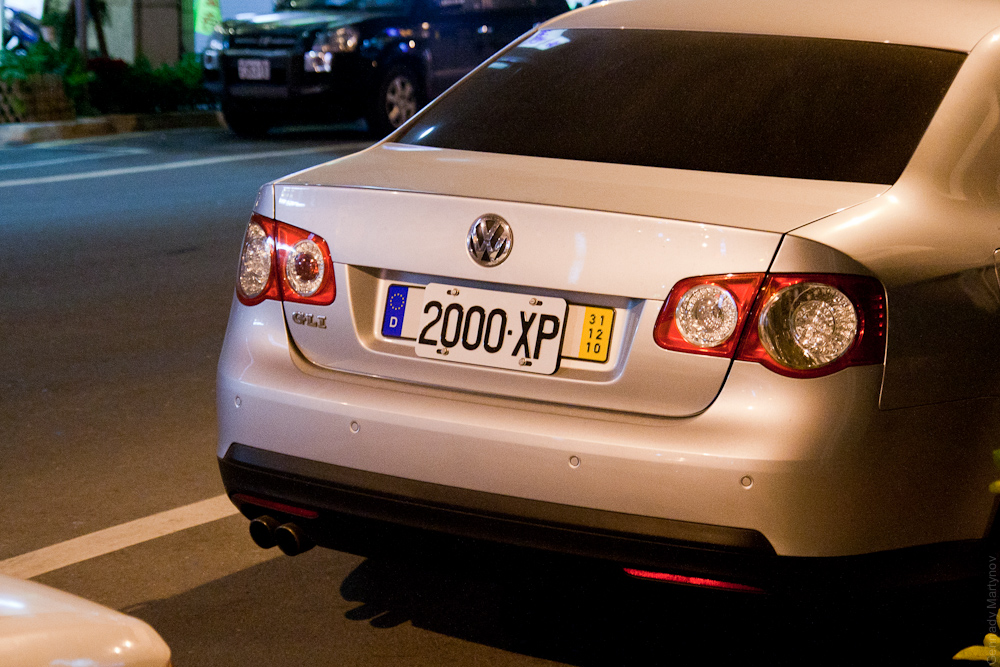

In [20]:
from PIL import Image
import matplotlib.pyplot as plt
img = 'test_model/20240607233054.jpg'
im = Image.open(img)
results = model_yolo(im)  # Set augment=True to enable test-time augmentation
crops = []
# Iterate over each result in the results object
for result in results:
    # Check if the current result has detected boxes
    if result.boxes:
        # Loop through each detection box
        for box in result.boxes.xyxy:
            # Convert tensor to list of Python integers
            xmin, ymin, xmax, ymax = map(int, box[:4])

            # Crop the image using the bounding box coordinates
            crop = im.crop((xmin, ymin, xmax, ymax))
            crops.append(crop)

    else:
        print("No detections were made in this result.")
im

In [21]:
crops[0]

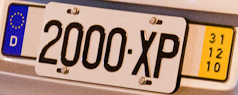

In [22]:
crops[1]